---
title: Perceptron Blog
author: Dean Smith
date: '2023-2-22'
image: "percep.png"
description: "In this blog I build and implement a simple perceptron model"
format: html
---

# Perceptron

In this blog, I will go through the steps of implementing a perceptron algorithm for various types of datasets. The purpose of this blog is to demonstrate how the perceptron works and its effectiveness on different datasets.

In the code cell below I import my data and packages use throughout this notebook including the source code perceptron.py that can be found using this link: https://github.com/dmsmith25/dmsmith25.github.io/blob/7eeef82cbf16398e0d0e9900e31df7dd50b99e12/posts/perceptron-project/perceptron.py

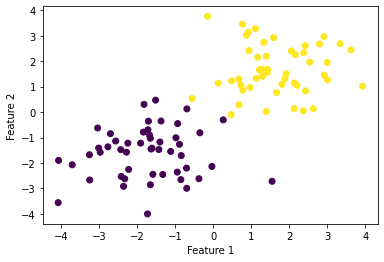

In [29]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from perceptron import Perceptron
from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

# create dataset
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")




In the cell below, I initialize an instance of the perceptron model as p. Additionally, I run the fit() function where the perceptron model inputs features and labels to then adjust its weights to classify any new points in the dataset.

In [30]:

p = Perceptron()
max_steps = 1000
p.fit(X, y, max_steps)

print(p.history[-10:])

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


Here, I plot the accuracy of the perceptron model over its iterations

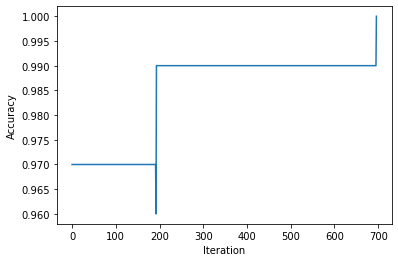

In [31]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Below, I use a function to draw the line determined by the perceptron model to classify the purple and yellow points.

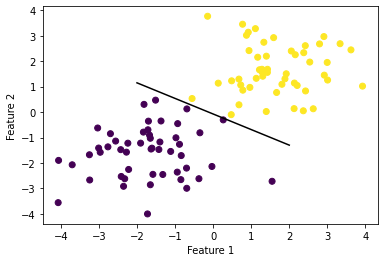

In [32]:
def draw_line(w, x_min, x_max,ax=None , style="solid"):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  if ax is None:
    if style == "solid":
      plt.plot(x, y, color = "black")
    if style == "dashed":
      plt.plot(x, y, "k--")
  else:
    ax.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Lastly, I check the score or accuracy of the model after fitting

In [33]:
p.score(X, y)

1.0

Next, I will train a perceptron model on a dataset that is not linearly seperable. Below, I have created such a set and printed a visualization of the data.

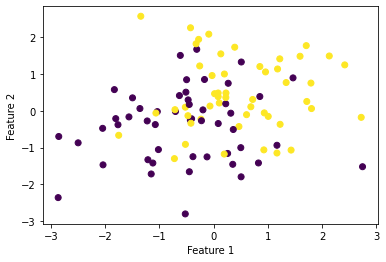

In [34]:
np.random.seed(12345)

n = 100
p_features = 3

# create dataset
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-0.5, -0.5), (0.5, 0.5)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Here, I train my new perceptron model and print the end of the training history. The training history does not reach 1.0 because the data is not linearly seperable.

In [35]:
p = Perceptron()
max_steps = 1000
p.fit(X, y, max_steps)

print(p.history[-10:])

[0.63, 0.68, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71]


Next, I visualize my training history.

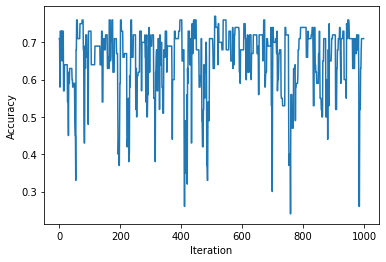

In [36]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Now, I visualize the line that my perceptron algorithm has created for my data.

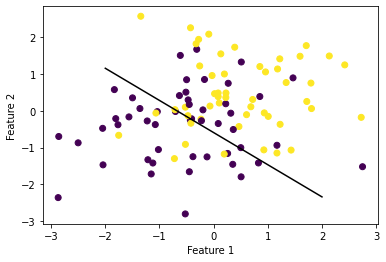

In [37]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Lastly, I now want to show the perceptron works for datasets with more than 5 features. In this case, I will use 9 features and I gather my dataset below.

In [38]:
n = 100
p_features = 10

# create dataset
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

Next, I train my new perceptron model and print the last 10 entries of the training accuracy. Because the training accuracy ends with 1.0, I can determine that this dataset is linearly seperable.

In [39]:
p = Perceptron()
max_steps = 1000
p.fit(X, y, max_steps)

print(p.history[-10:])

[0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 1.0]


Finally, I visualize the training accuracy:

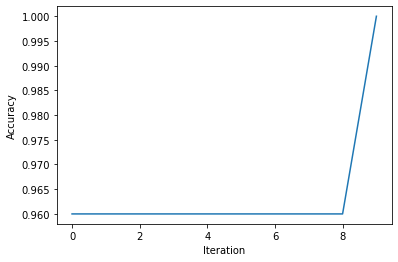

In [40]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Runtime Analysis

For each update of the perceptron, it will take O(p) runtime because the number of datapoints is irrelevant when talking about just a singular update. In each update, the runtime is dependant on the number of features or columns of the matricies being multiplied.

In my findings, I was able to implement the perceptron algorithm and test it on various types of data. When data is linearly seperable, the perceptron will be able to classify data with 100% accuracy. If data is not linearly seperable then it will find the "line of best fit" for that particular dataset. The perceptron can be used on datasets with many features and the implementation will still stay the same but visualizing results will be increasingly difficult.